In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
covertype = fetch_ucirepo(id=31) 
  
# data (as pandas dataframes) 
X = covertype.data.features 
y = covertype.data.targets.values.ravel()


In [3]:
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y

array([5, 5, 2, ..., 3, 3, 3], shape=(581012,))

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Test Accuracy: ", accuracy_score(y_test, y_pred))

Test Accuracy:  0.9559133585191433


In [8]:
import numpy as np

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    labels = np.unique(y_true)

    fig, ax = plt.subplots(figsize=(10, 8))
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.title(title, pad=20)

    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, f'{val}', ha='center', va='center', color='black')

    plt.tight_layout()
    plt.show()

def plot_feature_importance(model, feature_names, top_n=None, title="Feature Importance"):
    importances = model.feature_importances_
    n_features = len(feature_names)

    if top_n is None or top_n > n_features:
        top_n = n_features

    indices = np.argsort(importances)[::-1][:top_n]
    top_features = [feature_names[i] for i in indices]
    top_importances = importances[indices]

    plt.figure(figsize=(10, 0.4 * top_n + 2))  # Adjust height dynamically
    plt.barh(range(top_n), top_importances[::-1], align='center')
    plt.yticks(range(top_n), top_features[::-1])
    plt.xlabel("Importance Score")
    plt.title(title)
    plt.tight_layout()
    plt.show()

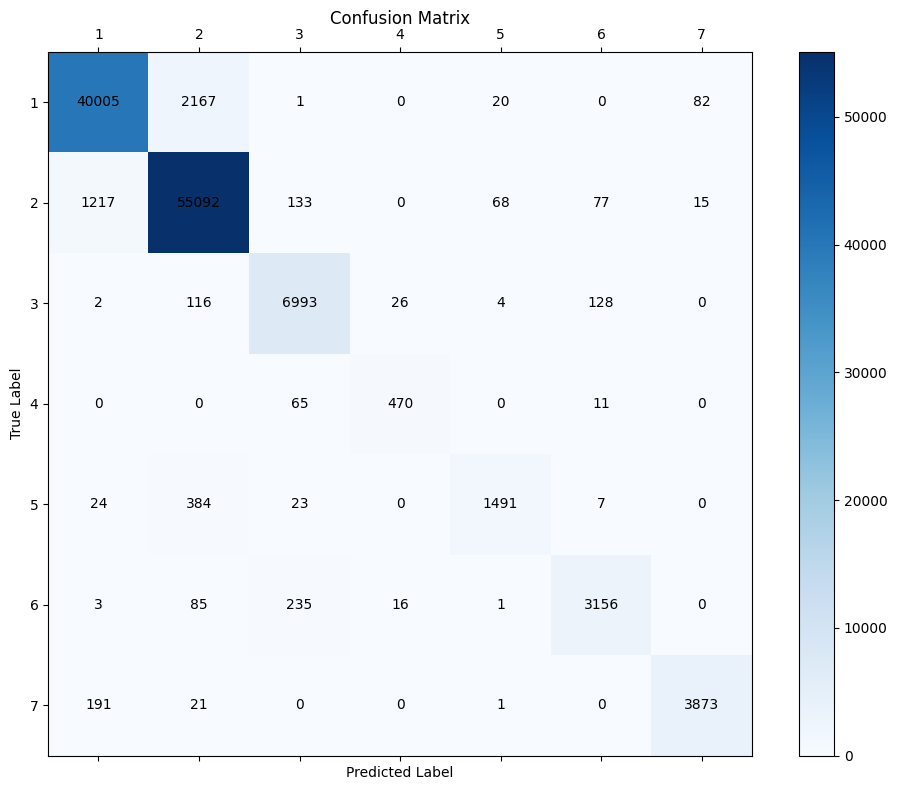

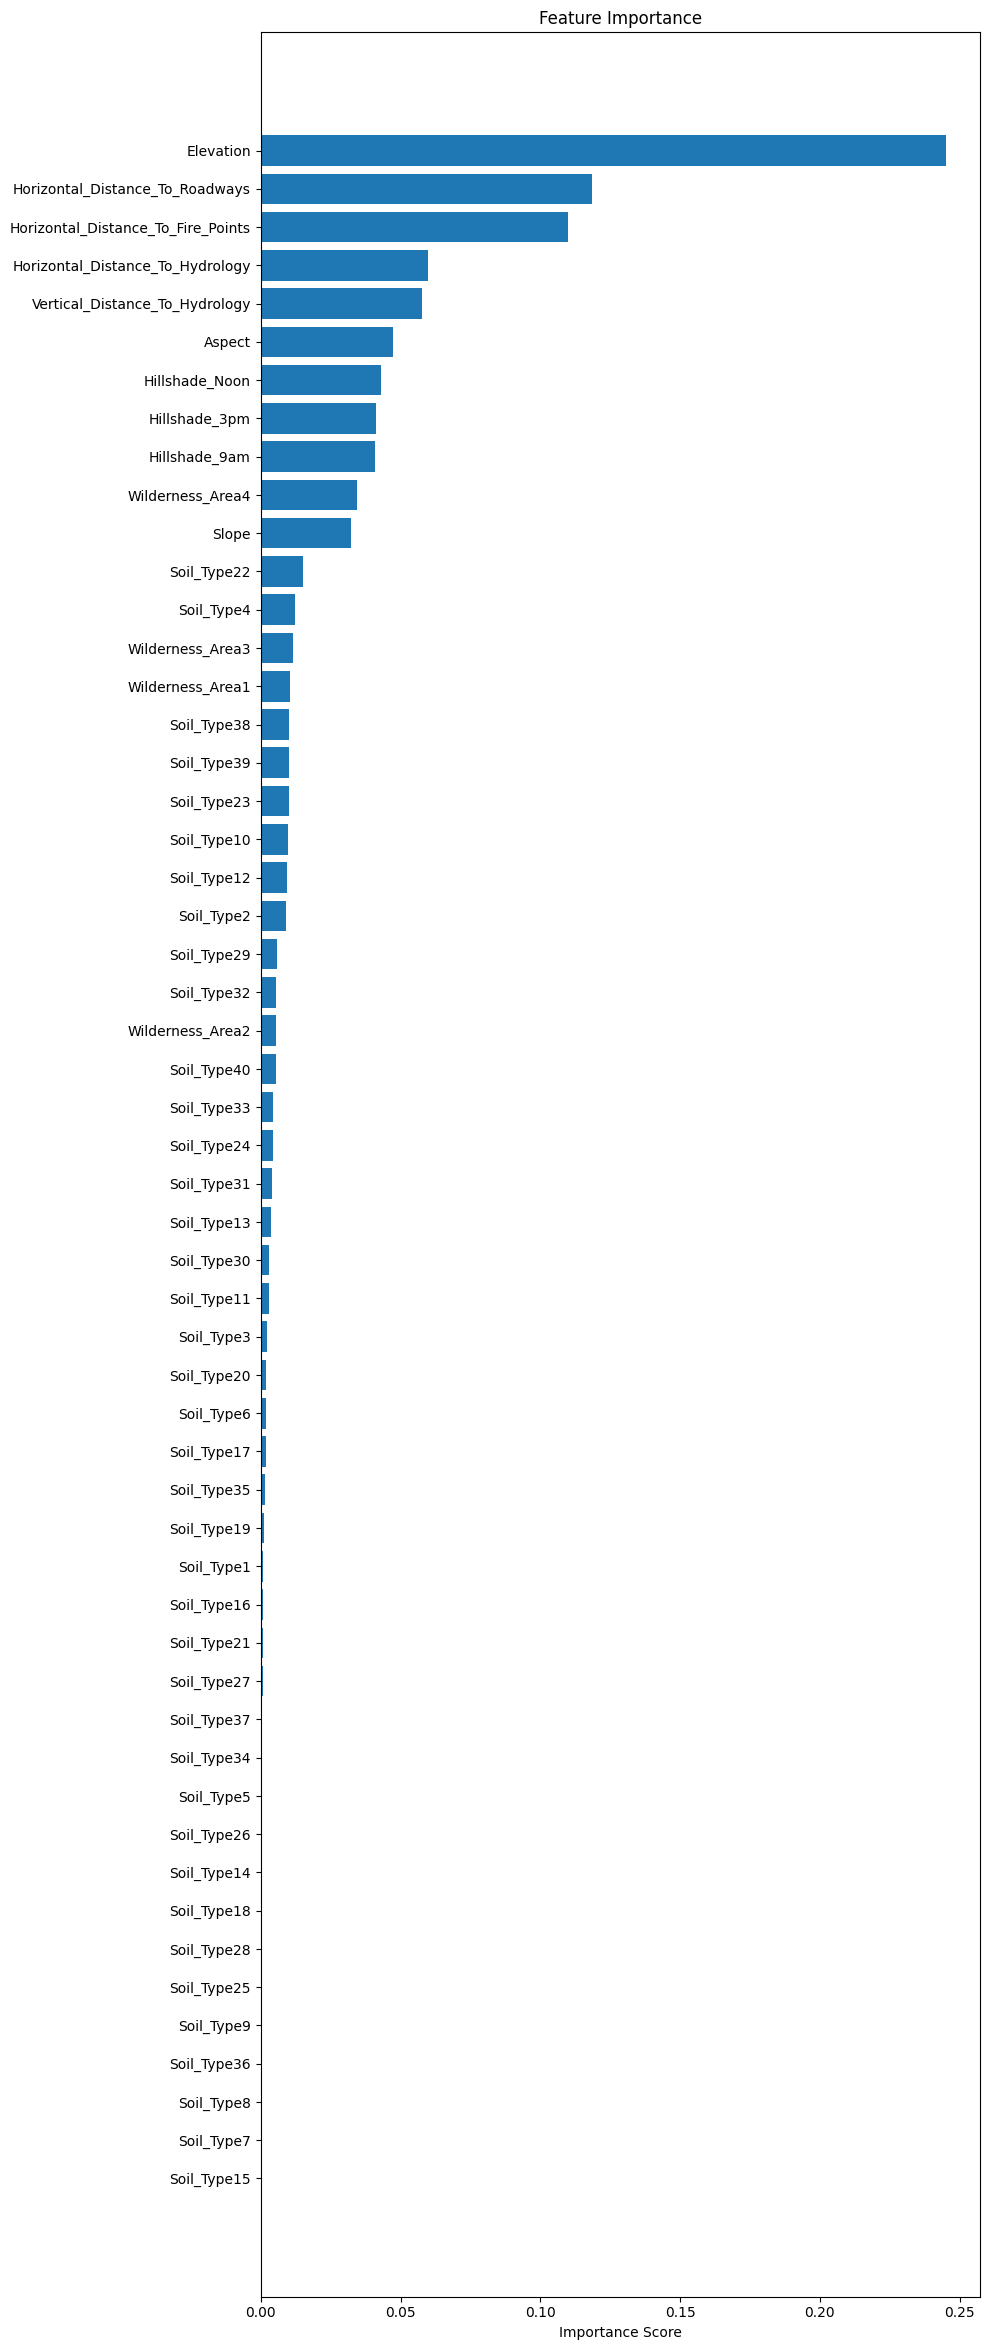

In [9]:
plot_confusion_matrix(y_test, y_pred)
plot_feature_importance(model, X.columns, title="Feature Importance")

In [12]:
#Hyperarameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2],
}


model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring = 'accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)


KeyboardInterrupt: 

Accuracy:  0.6593547498773698


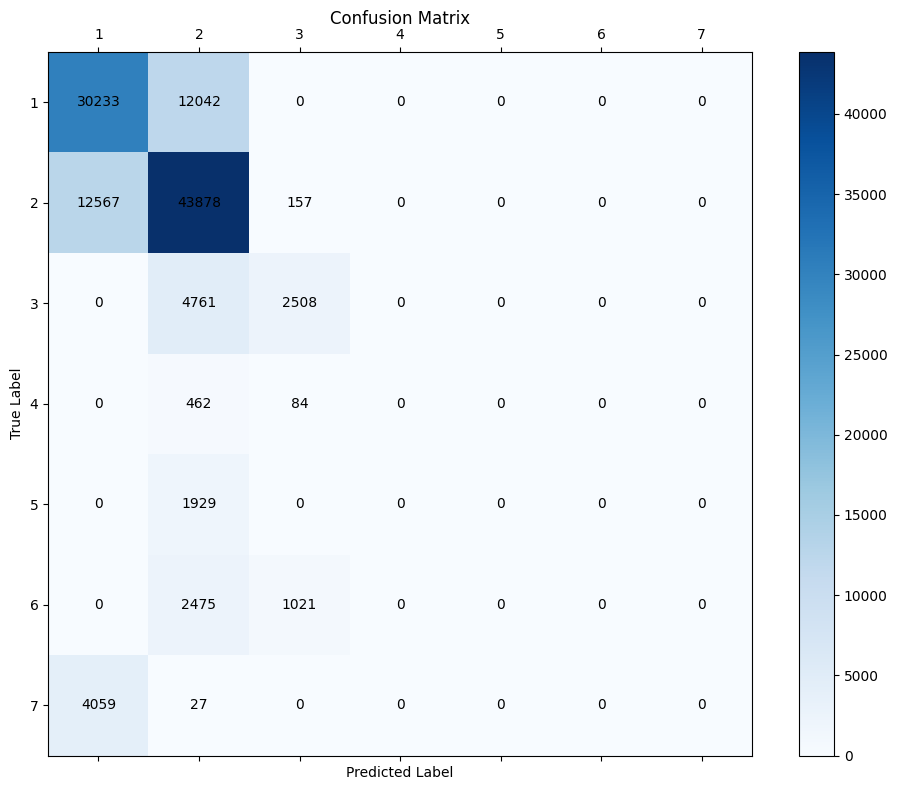

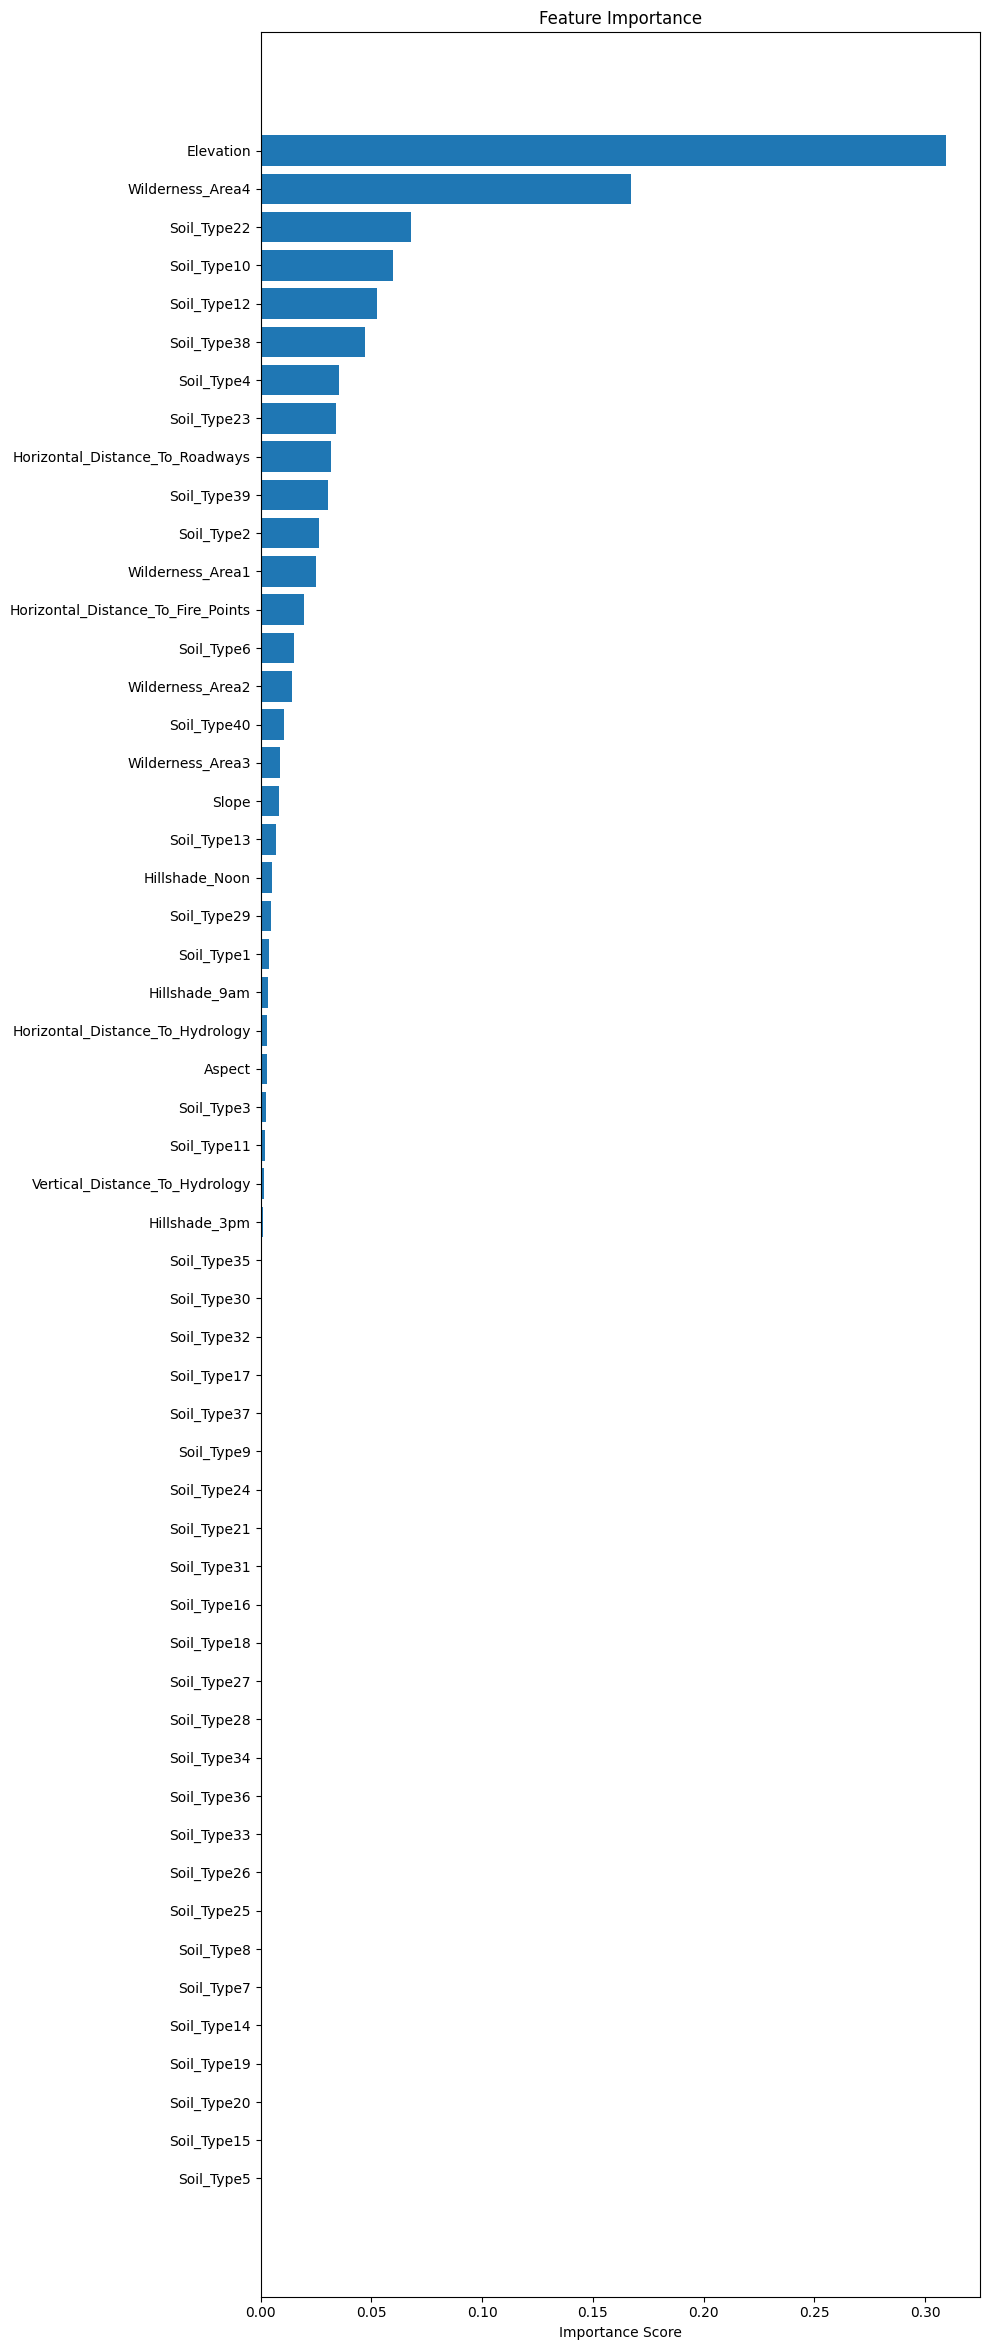

In [11]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
plot_confusion_matrix(y_test, y_pred)
plot_feature_importance(best_model, X.columns, title="Feature Importance")